<a href="https://colab.research.google.com/github/sunnysavita10/Indepth-GENAI/blob/main/MultiModal%20RAG%20using%20Vertex%20AI%20AstraDB(Cassandra)%C2%A0%26%C2%A0Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Vertex AI SDK for Python

In [ ]:
# !pip install --upgrade --user google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 23.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# !pip install ragstack-ai

  Using cached ragstack_ai-1.0.3-py3-none-any.whl (4.2 kB)
  Using cached ragstack_ai_colbert-1.0.2-py3-none-any.whl (19 kB)
  Using cached ragstack_ai_langchain-1.0.3-py3-none-any.whl (4.8 kB)
  Using cached ragstack_ai_llamaindex-1.0.2-py3-none-any.whl (3.1 kB)
  Using cached cassio-0.1.7-py3-none-any.whl (44 kB)
  Using cached colbert-ai-0.2.19.tar.gz (86 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

### Architecture
![Screenshot 2025-01-07 015236.png](<attachment:Screenshot 2025-01-07 015236.png>)
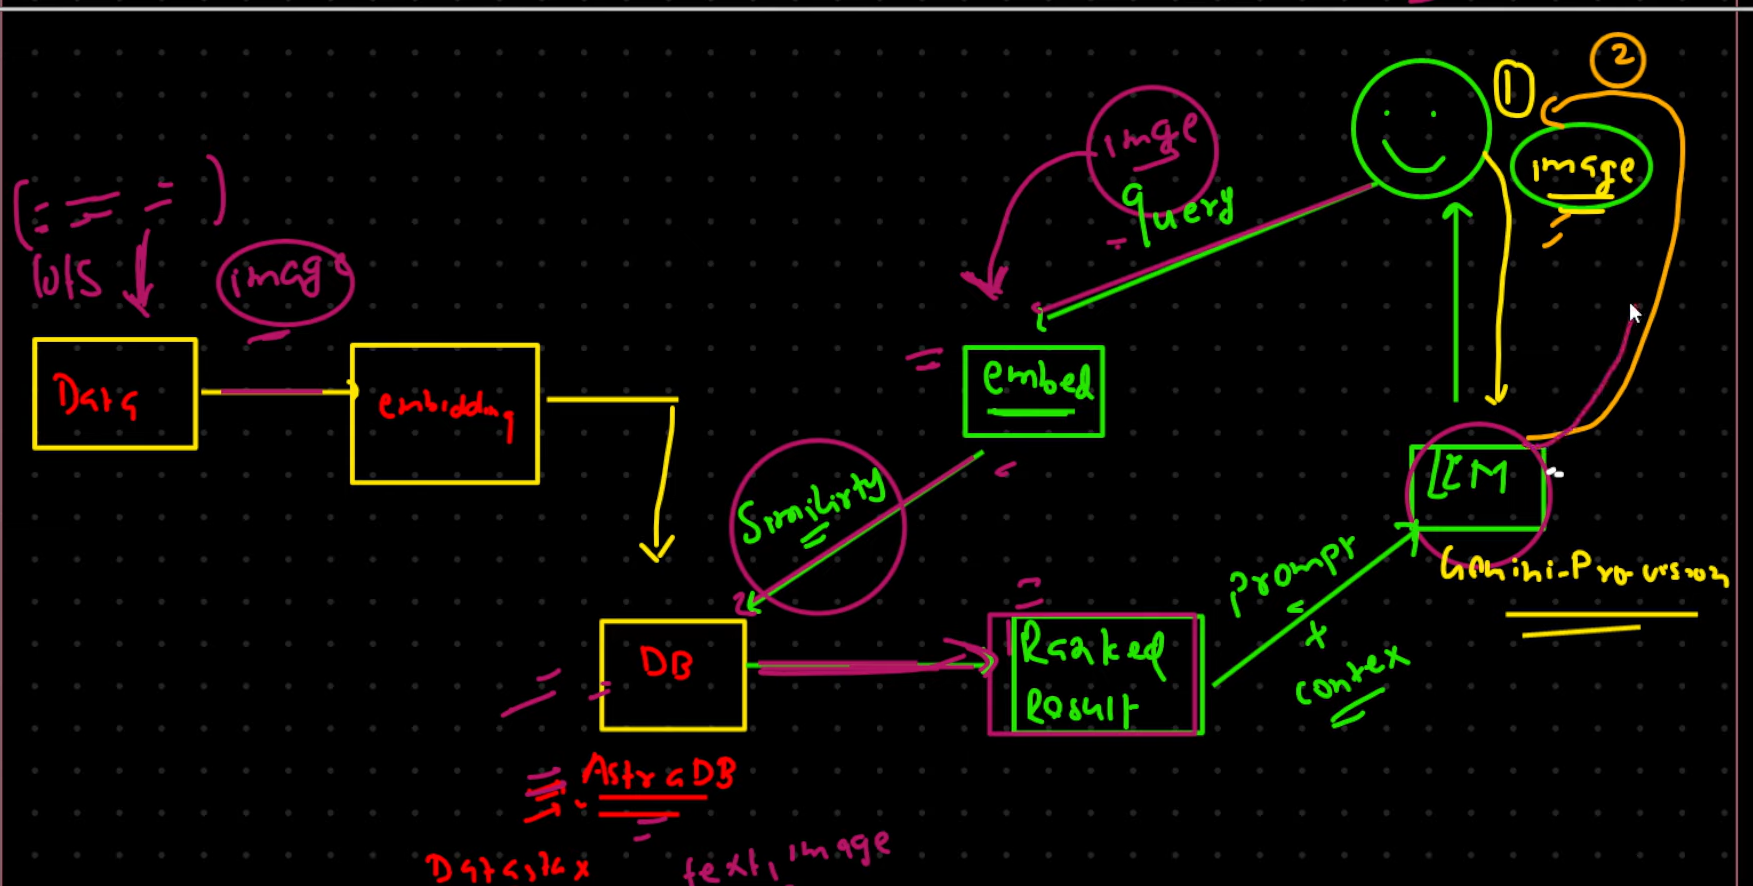

In [ ]:
PROJECT_ID = "red-delight-346705"
LOCATION = "us-central1"

In [ ]:
ASTRA_DB_API_ENDPOINT=""
ASTRA_DB_APPLICATION_TOKEN=""

'\nPROJECT_ID = "red-delight-346705"\nLOCATION = "us-central1\nASTRA_DB_API_ENDPOINT="https://d2357619-8f04-4cfd-bc3a-16e410893ba3-us-east-2.apps.astra.datastax.com"\nASTRA_DB_APPLICATION_TOKEN="AstraCS:hTmlZSqmAOUHSWZaeNqzEDOR:1128826e960e49c2508b3014ae7fa40e6b5d0490d8565702a30b4ea338083a4a"\n'

In [ ]:
import getpass, os, requests

if "GCP_PROJECT_ID" not in os.environ:
  os.environ["GCP_PROJECT_ID"] = getpass.getpass("Provide your GCP Project ID")

if "LOCATION" not in os.environ:
  os.environ["LOCATION"] = getpass.getpass("Provide your GCP Location")

if "ASTRA_DB_ENDPOINT" not in os.environ:
  os.environ["ASTRA_DB_ENDPOINT"] = getpass.getpass("Provide your Astra DB Endpoint")

if "ASTRA_DB_TOKEN" not in os.environ:
  os.environ["ASTRA_DB_TOKEN"] = getpass.getpass("Provide your Astra DB Token")

Provide your GCP Project ID··········
Provide your GCP Location··········
Provide your Astra DB Endpoint··········
Provide your Astra DB Token··········


## Authenticate your notebook environment ( Colab only )

In [ ]:
!gcloud config set project {os.getenv("GCP_PROJECT_ID")}

Updated property [core/project].


In [ ]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user() # authentication to connect with vertex ai

In [ ]:
!gcloud auth list # checking the authentication list here email is showing

  Credentialed Accounts
ACTIVE  ACCOUNT
*       colab0@ineuron.ai

To set the active account, run:
    $ gcloud config set account `ACCOUNT`



## Set Google Cloud project information and initialize Vertex AI SDK

In [ ]:
# Define project information
PROJECT_ID=os.getenv("GCP_PROJECT_ID")
LOCATION=os.getenv("LOCATION")

In [ ]:
# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION) # Initialize vertex AI with project and location

## Import libraries

In [ ]:
from vertexai.preview.generative_models import (
    GenerationConfig,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part
)

## Use the Gemini 1.0 Pro model

The Gemini 1.0 Pro (`gemini-1.0-pro`) model is designed to handle natural language tasks, multi-turn text and code chat, and code generation.


## Load the Gemini 1.0 Pro model

In [ ]:
model = GenerativeModel("gemini-1.0-pro")

## Generate text from text prompts

In [ ]:
responses = model.generate_content("Why is the sky blue?", stream=True)

In [ ]:
for response in responses:
    print(response.text, end="")

The sky appears blue due to a phenomenon called Rayleigh scattering. Sunlight is composed of all colors of the rainbow, each with a different wavelength. When sunlight enters the Earth's atmosphere, it interacts with the gas molecules present there. Blue light, with its shorter wavelength, is scattered more effectively by these molecules than other colors. This scattered blue light reaches our eyes from all directions in the sky, making it appear blue.

Here's a more detailed explanation:

1. **Sunlight:** Sunlight is a mixture of all colors, each with a different wavelength. Blue light has a shorter wavelength than other colors like red or yellow.
2. **Earth's atmosphere:** The Earth has a blanket of gas surrounding it called the atmosphere. This atmosphere is made up of tiny particles, including nitrogen and oxygen molecules.
3. **Rayleigh scattering:** When sunlight enters the atmosphere, it interacts with these gas molecules. The shorter wavelengths of blue light are scattered more

In [ ]:
prompt = """Create a numbered list of 10 items. Each item in the list should be a trend in the tech industry.

Each trend should be less than 5 words."""  # try your own prompt


In [ ]:
responses = model.generate_content(prompt, stream=True)

In [ ]:
for response in responses:
    print(response.text, end="")

## 10 Tech Industry Trends:

1. AI Personalization
2. Metaverse Expansion
3. Edge Computing Growth
4. Quantum Computing Advancements
5. Blockchain Security Focus
6. Cybersecurity Mesh Architecture
7. Hyperautomation Adoption
8. Sustainable Tech Development
9. Low-Code/No-Code Platforms
10. Generative AI Applications

## Model parameters

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. You can experiment with different model parameters to see how the results change.

In [ ]:
generation_config = GenerationConfig(
    temperature=0.9, # Controls the randomness of the output (higher = more random) this mean not much accurate result
    top_p=1.0, # Uses sampling to limit choices to the top probability With 1.0, all tokens are considered; if 0.5, only the top 50% of tokens are considered.
    top_k=32, # Limits the output to the top-k most likely tokens at each generation step
    candidate_count=1,  # Specifies how many alternative completions to generate according to this 1 for 1 inputs if their is 2 then 2 outputs for 2 inputs
    max_output_tokens=8192,  # Sets the maximum number of tokens (words/pieces) to generate in a single response.
)


In [ ]:
responses = model.generate_content(
    "Why is the sky blue?",
    generation_config=generation_config,
    stream=True,
)


In [ ]:
for response in responses:
    print(response.text, end="")

The sky is blue because of a phenomenon called **Rayleigh scattering**. Sunlight is made up of all the colors of the rainbow, but blue light has a shorter wavelength than other colors. When light enters the Earth's atmosphere, it interacts with the molecules in the air. These molecules scatter the light in all directions. However, because blue light has a shorter wavelength, it is scattered more easily than other colors. This is why we see a blue sky. 

Here are some additional details about Rayleigh scattering:

* The intensity of the scattered light is inversely proportional to the fourth power of the wavelength. This means that blue light is scattered much more strongly than red light.
* The amount of scattering also depends on the density of the atmosphere. The higher the density, the more scattering there is. This is why the sky is often a deeper blue at higher altitudes.
* Rayleigh scattering is also responsible for the red and orange colors of sunrises and sunsets. When the sun 

In [ ]:
source_img_data = requests.get('https://drive.google.com/uc?export=view&id=15ddcn-AIxpvRdWcFGvIr77XLWdo4Maof').content

In [ ]:
with open('coffee_maker_part.png', 'wb') as handler:
  handler.write(source_img_data)

In [ ]:
from langchain_google_vertexai import ChatVertexAI

In [ ]:
from langchain.schema.messages import HumanMessage
from PIL import Image, ImageFile
import os, sys


In [ ]:
chat = ChatVertexAI(model_name="gemini-1.0-pro-vision",safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE
    },)

In [ ]:
image_message = {
    "type": "image_url",
    "image_url": {"url": "coffee_maker_part.png"},
}
text_message = {
    "type": "text",
    "text": "What is this image? Share a link to purchase a replacement",
}

In [ ]:
message = HumanMessage(content=[text_message, image_message])

In [ ]:
output = chat([message])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [ ]:
print(output.content)

 This is a replacement filter basket for a Moka pot coffee maker. You can purchase a replacement here:

https://www.amazon.com/Replacement-Filter-Basket-Moka-Express/dp/B07171163K/


In [ ]:
import pandas as pd

d = {'name': ["Saucer", "Saucer Ceramic", "Milk Jug Assembly", "Handle Steam Wand Kit (New Version From 0735 PDC)", "Spout Juice Small (From 0637 to 1041 PDC)", "Cleaning Steam Wand", "Jug Frothing", "Spoon Tamping 50mm", "Collar Grouphead 50mm", "Filter 2 Cup Dual Wall 50mm", "Filter 1 Cup 50mm", "Water Tank Assembly", "Portafilter Assembly 50mm", "Milk Jug Assembly", "Filter 2 Cup 50mm" ],
     'url': ["https://www.breville.com/us/en/parts-accessories/parts/sp0014946.html?sku=SP0014946", "https://www.breville.com/us/en/parts-accessories/parts/sp0014914.html?sku=SP0014914", "https://www.breville.com/us/en/parts-accessories/parts/sp0011391.html?sku=SP0011391", "https://www.breville.com/us/en/parts-accessories/parts/sp0010719.html?sku=SP0010719", "https://www.breville.com/us/en/parts-accessories/parts/sp0010718.html?sku=SP0010718", "https://www.breville.com/us/en/parts-accessories/parts/sp0003247.html?sku=SP0003247", "https://www.breville.com/us/en/parts-accessories/parts/sp0003246.html?sku=SP0003246", "https://www.breville.com/us/en/parts-accessories/parts/sp0003243.html?sku=SP0003243", "https://www.breville.com/us/en/parts-accessories/parts/sp0003232.html?sku=SP0003232", "https://www.breville.com/us/en/parts-accessories/parts/sp0003231.html?sku=SP0003231", "https://www.breville.com/us/en/parts-accessories/parts/sp0003230.html?sku=SP0003230", "https://www.breville.com/us/en/parts-accessories/parts/sp0003225.html?sku=SP0003225", "https://www.breville.com/us/en/parts-accessories/parts/sp0003216.html?sku=SP0003216", "https://www.breville.com/us/en/parts-accessories/parts/sp0001875.html?sku=SP0001875", "https://www.breville.com/us/en/parts-accessories/parts/sp0000166.html?sku=SP0000166"],
     'price': ["10.95", "4.99", "14.95", "8.95", "10.95", "6.95", "24.95", "8.95", "6.95", "12.95", "12.95", "14.95", "10.95", "16.95", "11.95"],
     'image': ["https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0014946/tile.jpg", "https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0014914/tile.jpg", "https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0011391/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0010719/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0010718/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003247/tile.jpg", "https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/BES250/SP0003246/SP0003246_IMAGE1_400X400.jpg", "https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/ESP8/SP0003243/SP0003243_IMAGE1_400X400.jpg", "https://assets.breville.com/cdn-cgi/image/width=400,format=auto/Spare+Parts+/Espresso+Machines/ESP8/SP0003232/SP0003232_IMAGE1_400x400.jpg", "https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003231/tile.jpg", "https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003230/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003225/tile.jpg", "https://www.breville.com/content/dam/breville/ca/catalog/products/images/sp0/sp0003216/tile.jpg", "https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0001875/tile.jpg", "https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0000166/tile.jpg"]}
df = pd.DataFrame(data=d)
df

,name,url,price,image
0,Saucer,https://www.breville.com/us/en/parts-accessori...,10.95,https://www.breville.com/content/dam/breville/...
1,Saucer Ceramic,https://www.breville.com/us/en/parts-accessori...,4.99,https://www.breville.com/content/dam/breville/...
2,Milk Jug Assembly,https://www.breville.com/us/en/parts-accessori...,14.95,https://www.breville.com/content/dam/breville/...
3,Handle Steam Wand Kit (New Version From 0735 PDC),https://www.breville.com/us/en/parts-accessori...,8.95,https://www.breville.com/content/dam/breville/...
4,Spout Juice Small (From 0637 to 1041 PDC),https://www.breville.com/us/en/parts-accessori...,10.95,https://www.breville.com/content/dam/breville/...
5,Cleaning Steam Wand,https://www.breville.com/us/en/parts-accessori...,6.95,https://www.breville.com/content/dam/breville/...
6,Jug Frothing,https://www.breville.com/us/en/parts-accessori...,24.95,https://assets.breville.com/cdn-cgi/image/widt...
7,Spoon Tamping 50mm,https://www.breville.com/us/en/parts-accessori...,8.95,https://assets.breville.com/cdn-cgi/image/widt...
8,Collar Grouphead 50mm,https://www.breville.com/us/en/parts-accessori...,6.95,https://assets.breville.com/cdn-cgi/image/widt...
9,Filter 2 Cup Dual Wall 50mm,https://www.breville.com/us/en/parts-accessori...,12.95,https://www.breville.com/content/dam/breville/...


In [ ]:
import vertexai, json, requests
from vertexai.preview.vision_models import MultiModalEmbeddingModel, Image
from astrapy.db import AstraDB, AstraDBCollection
from google.colab import files

In [ ]:
model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding@001")

In [ ]:
# Initialize our vector db
astra_db = AstraDB(token=os.getenv("ASTRA_DB_TOKEN"), api_endpoint=os.getenv("ASTRA_DB_ENDPOINT"))

In [ ]:
collection = astra_db.create_collection(collection_name="coffee_shop_ecommerce", dimension=1408)

In [ ]:
for i in range(len(df)):
  name = df.loc[i, "name"]
  image = df.loc[i, "image"]
  price = df.loc[i, "price"]
  url = df.loc[i, "url"]

  # Download this product's image and save it to the Colab filesystem.
  # In a production system this binary data would be stored in Google Cloud Storage
  img_data = requests.get(image).content # sends an HTTP GET request to download the image from the URL specified by the image variable (contains image's URL in df dataframe)
  with open(f'{name}.png', 'wb') as handler:
    handler.write(img_data) # Writes the downloaded image data (img_data) to the to current directory

  # load the image from filesystem and compute the embedding value
  img = Image.load_from_file(f'{name}.png') # Loads the saved image ({name}.png) from the file system into memory
  embeddings = model.get_embeddings(image=img, contextual_text=name) # contextual_text=name: helps model to understand that image associated with specific name e.g apple, iphone

  try:
    # add to the AstraDB Vector Database
    collection.insert_one({
        "_id": i,
        "name": name,
        "image": image,
        "url": url,
        "price": price,
        "$vector": embeddings.image_embedding,
      })
  except Exception as error:
    # if you've already added this record, skip the error message
    error_info = json.loads(str(error))
    if error_info[0]['errorCode'] == "DOCUMENT_ALREADY_EXISTS":
      print("Document already exists in the database.  Skipping.")

In [ ]:
import json

# Embed the similar item
img = Image.load_from_file('coffee_maker_part.png')

In [ ]:
embeddings = model.get_embeddings(image=img, contextual_text="A espresso machine part")

In [ ]:
embeddings.image_embedding

[0.0103443023,
 -0.0423360355,
 0.0025271,
 0.0468370356,
 -0.00584532041,
 -0.0222770683,
 -0.0102790007,
 -0.0213940851,
 -0.0253922492,
 -0.00449423306,
 -0.0144735314,
 -0.0385552645,
 0.0178169888,
 0.16114834,
 -0.0240380447,
 0.00393703813,
 0.0563112088,
 -0.00262522465,
 -0.0355723463,
 0.0185569692,
 -0.0134987067,
 -0.00920229312,
 -0.00511650136,
 -0.01109982,
 0.00243064575,
 0.00353293261,
 0.00684218062,
 -0.0174581669,
 0.0498942062,
 -0.0408516265,
 0.027069347,
 -0.00324063702,
 0.00235783681,
 0.0173611976,
 0.0509904698,
 -0.0192037039,
 -0.0190860294,
 0.0200846344,
 -0.00735383,
 -0.00653002458,
 -0.0258874968,
 0.0159182101,
 -0.028728202,
 -0.0242897402,
 0.0104897087,
 -0.0224464387,
 -0.030899208,
 0.00114898989,
 0.00913333,
 -0.000930706214,
 -0.0330116823,
 -0.0142512815,
 0.0255830139,
 -0.0319835283,
 0.0354433805,
 0.00188259548,
 -0.0174734276,
 -0.0277424678,
 0.041069936,
 -0.0386415832,
 0.00900212117,
 -0.00827264,
 0.0344879851,
 -0.0153776715,
 0.

In [ ]:
# Perform the vector search against AstraDB Vector
documents = collection.vector_find(
    embeddings.image_embedding,
    limit=3, # 3 most similar results based on the vector search
)

In [ ]:
documents

[{'_id': 9,
  'name': 'Filter 2 Cup Dual Wall 50mm',
  'image': 'https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003231/tile.jpg',
  'url': 'https://www.breville.com/us/en/parts-accessories/parts/sp0003231.html?sku=SP0003231',
  'price': '12.95',
  '$vector': [-0.0016570494,
   -0.0407555103,
   0.00935325678,
   0.0240484532,
   -0.00291985,
   -0.023472514,
   0.0204959288,
   -0.0365891866,
   -0.0348752663,
   -0.0137095125,
   0.00393085787,
   -0.0286927726,
   -0.00180356076,
   0.144395873,
   -0.0417751111,
   0.0265446492,
   0.0673256218,
   6.99815646e-05,
   -0.00777975097,
   0.00130614766,
   -0.0132598253,
   -0.00493014464,
   -0.0316618159,
   -0.02309875,
   0.000352492963,
   0.0071709957,
   -0.00876005273,
   -0.0158251692,
   0.0584977381,
   -0.0318364725,
   0.0148035036,
   0.00369193917,
   0.00901080202,
   0.001295547,
   0.0110316193,
   -0.0195775498,
   -0.00320023973,
   0.0139058586,
   0.00714511704,
   -0.00286253169,


In [ ]:
related_products_csv = "name, image, price, url\n"
for doc in documents:
  related_products_csv += f"{doc['name']}, {doc['image']}, {doc['price']}, {doc['url']},\n"

In [ ]:
print(related_products_csv)

name, image, price, url
Filter 2 Cup Dual Wall 50mm, https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003231/tile.jpg, 12.95, https://www.breville.com/us/en/parts-accessories/parts/sp0003231.html?sku=SP0003231,
Filter 2 Cup 50mm, https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0000166/tile.jpg, 11.95, https://www.breville.com/us/en/parts-accessories/parts/sp0000166.html?sku=SP0000166,
Filter 1 Cup 50mm, https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003230/tile.jpg, 12.95, https://www.breville.com/us/en/parts-accessories/parts/sp0003230.html?sku=SP0003230,



In [ ]:
image_message = {
    "type": "image_url",
    "image_url": {"url": "/content/coffee_maker_part.png"},
}
text_message = {
    "type": "text",
    "text": f"What we have in this image? Share the URL and price to purchase a replacement. Here are related products {related_products_csv}",
}

In [ ]:
message = HumanMessage(content=[text_message, image_message])


In [ ]:
chat = ChatVertexAI(model_name="gemini-1.0-pro-vision",safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE
    },)

In [ ]:
output = chat([message])

In [ ]:
print(output.content)

 The image shows a Breville 50mm filter basket. It can be purchased for $12.95 from the Breville website.

Related products:
Filter 2 Cup Dual Wall 50mm, https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003231/tile.jpg, 12.95, https://www.breville.com/us/en/parts-accessories/parts/sp0003231.html?sku=SP0003231,
Filter 2 Cup 50mm, https://www.breville.com/content/dam/breville/us/catalog/products/images/sp0/sp0000166/tile.jpg, 11.95, https://www.breville.com/us/en/parts-accessories/parts/sp0000166.html?sku=SP0000166,
Filter 1 Cup 50mm, https://www.breville.com/content/dam/breville/au/catalog/products/images/sp0/sp0003230/tile.jpg, 12.95, https://www.breville.com/us/en/parts-accessories/parts/sp0003230.html?sku=SP0003230,
